# Pymaceuticals Inc.
---

## Analysis
* Capomulin does show promise.
* The chonkier (heavier) the rat, the chonkier the tumor. Seems sad, but makes sense.
* Infubinol almost seems like a control, it didn't seem to shrink the tumors by much (at least out of the 4 that were charted).
* Many rats were harmed in the collection of this data.

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(combined_results_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplate_mice = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results_df = combined_results_df[combined_results_df["Mouse ID"] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(cleaned_results_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tv_mean_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tv_median_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tv_var_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tv_std_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tv_sem_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

tumor_volume_df = pd.DataFrame(
    {
        "Mean Tumor Volume": tv_mean_series,
        "Median Tumor Volume": tv_median_series,
        "Tumor Volume Variance":tv_var_series,
        "Tumor Volume Std. Dev.":tv_std_series,
        "Tumor Volume Std. Err.":tv_sem_series
    }
)

tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

tumor_volume_df_2 = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

tumor_volume_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

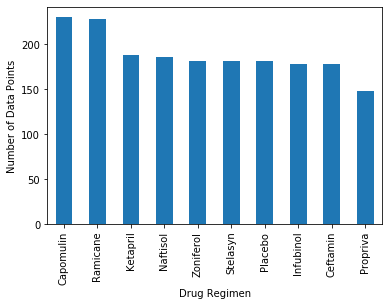

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

cleaned_results_df["Drug Regimen"].value_counts().plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

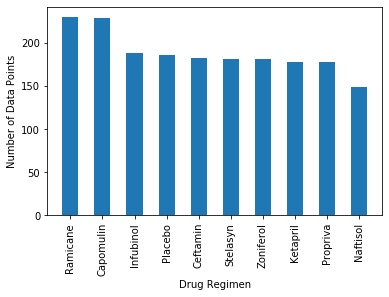

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_series = cleaned_results_df["Drug Regimen"].value_counts()
drugs = cleaned_results_df["Drug Regimen"].unique()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.bar(drugs, drug_series,width=0.5)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Data Points')
ax.set_xticklabels(drugs,rotation=90)

plt.show()

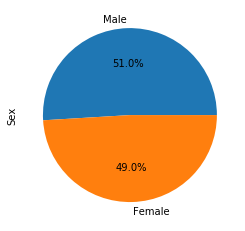

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleaned_results_df["Sex"].value_counts().plot(kind='pie',autopct='%1.1f%%')

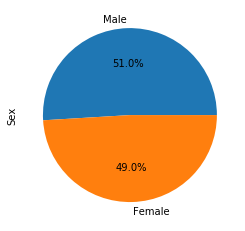

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_results_df["Sex"].value_counts()

#plt.pie(gender, labels=['male', 'female'])
#plt.show()

fig1,ax1 = plt.subplots()
ax1.pie(gender, labels=['Male', 'Female'], autopct='%1.1f%%')
ax1.set_ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_regimen = cleaned_results_df[cleaned_results_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infbinol", "Ceftamin"])]
last_tp = drug_regimen.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].last()

In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(last_tp, cleaned_results_df, how="left", on="Mouse ID",suffixes=("_Max", "_Base"))

tumor_last_vol = tumor_df.groupby(["Drug Regimen", "Mouse ID","Weight (g)"]).last()["Tumor Volume (mm3)"]

tumor_last_vol_reset =  tumor_last_vol.reset_index()
print(tumor_last_vol_reset)
tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Capomulin"]

Drug Regimen Mouse ID  Weight (g)  Tumor Volume (mm3)
0     Capomulin     b128          22           38.982878
1     Capomulin     b742          21           38.939633
2     Capomulin     f966          17           30.485985
3     Capomulin     g288          19           37.074024
4     Capomulin     g316          22           40.159220
..          ...      ...         ...                 ...
70     Ramicane     s508          17           30.276232
71     Ramicane     u196          25           40.667713
72     Ramicane     w678          24           43.166373
73     Ramicane     y449          24           44.183451
74     Ramicane     z578          16           30.638696

[75 rows x 4 columns]


,Drug Regimen,Mouse ID,Weight (g),Tumor Volume (mm3)
0,Capomulin,b128,22,38.982878
1,Capomulin,b742,21,38.939633
2,Capomulin,f966,17,30.485985
3,Capomulin,g288,19,37.074024
4,Capomulin,g316,22,40.159220
5,Capomulin,i557,24,47.685963
6,Capomulin,i738,20,37.311846
7,Capomulin,j119,23,38.125164
8,Capomulin,j246,21,38.753265
9,Capomulin,l509,21,41.483008


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_lst = []
box_plt_data = []

for drug in treatments:
    in_list = tumor_last_vol_reset[tumor_last_vol_reset['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_lst.append(in_list)
    
    print(drug)
    print(tumor_vol_lst)

    quartiles = in_list.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # TODO find the outlier
    #for value in tumor_vol_lst:
     #  if tumor_vol_lst[(tumor_vol_lst[value] < lower_bound) | (tumor_vol_lst[value] > upper_bound)]:
     #     print(f"Mouse hello is an outlier with a Tumor Volume of {value}")

   # box_plt_data.append

# Issue -- Why is Infubinol showing as NaN? What'd I do wrong?


Capomulin
[0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64]
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
[0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.3773

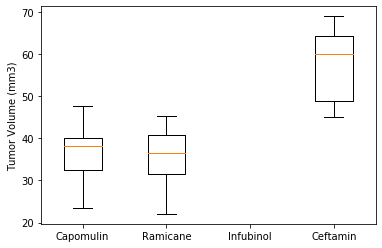

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# What data do I need for the graph

fig1, ax = plt.subplots()
ax.boxplot([tumor_vol_lst[0],tumor_vol_lst[1],tumor_vol_lst[2],tumor_vol_lst[3]])
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

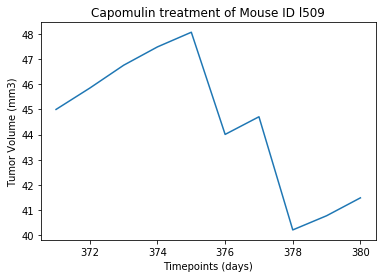

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse id l509

id_i509 = cleaned_results_df[cleaned_results_df["Mouse ID"] == "l509"]
tp_series = id_i509['Timepoint']

# print(id_i509)

id_i509['Tumor Volume (mm3)'].plot.line()
#id_i509.plot.line(x=tp_series ,y=id_i509['Tumor Volume (mm3)'])

plt.title("Capomulin treatment of Mouse ID l509")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


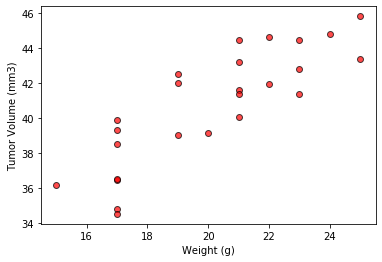

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scat_df = cleaned_results_df.loc[cleaned_results_df['Drug Regimen']=='Capomulin']
weight = capo_scat_df.groupby(['Mouse ID']).mean()['Weight (g)']
t_volume = capo_scat_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

cap_splot = pd.merge(weight, t_volume, how='left', on='Mouse ID')

plt.scatter(cap_splot['Weight (g)'],cap_splot['Tumor Volume (mm3)'],marker='o', facecolors='red',edgecolors='black',alpha=0.7)
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The Correlation between mouse wieght and the average tumor volume is 0.84.


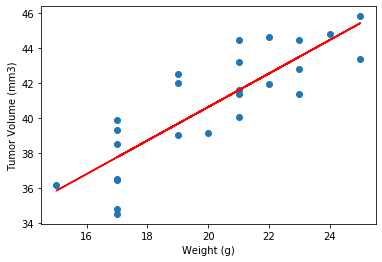

In [21]:
# Calculate the correlation coefficient and linear regression model 
wt = cap_splot.iloc[:,0]
tvol = cap_splot.iloc[:,1]
print(f" The Correlation between mouse wieght and the average tumor volume is {round(st.pearsonr(wt,tvol)[0],2)}.")

# for mouse weight and average tumor volume for the Capomulin regimen

x_val = cap_splot['Weight (g)']
y_val = cap_splot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val,y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()